# 1: Déterminer quelles sont les caractéristiques intéressantes au vu du thème du projet

In [61]:
import soundfile as sf

def caracteristique(fich):
    info = sf.info(fich) 
    print(f"Nombre d'échantillons: {info.frames}")
    print(f"Fréquence d'échantillonnage: {info.samplerate}Hz")
    print(f"Nombre de stéréo: {info.channels}")
    print(f"Encodeur: {info.format}")

    
caracteristique("DS_short.wav")





Nombre d'échantillons: 2646000
Fréquence d'échantillonnage: 44100Hz
Nombre de stéréo: 1
Encodeur: WAV


# 2: Déduire quel(s) fichier(s) est(sont) en stéréo, et quel(s) fichier(s) est(sont) en haute définition.
Justifiez.

In [128]:
def qualite(fich):
    info=sf.info(fich)
    if info.samplerate > 44100:
        print("Le fichier audio est de qualité HD car Fe > 44,1kHz")
    else:
        print("Le fichier audio est de qualité SD car Fe <= 44,1kHz")
qualite("AJS_short.flac")
qualite("DS_short.wav")

Le fichier audio est de qualité HD car Fe > 44,1kHz
Le fichier audio est de qualité SD car Fe <= 44,1kHz


# 3: Ecrire une fonction qui prend en entrée un fichier audio et rend en sortie deux vecteurs contenant séparément les pistes gauche et droite du morceau

In [84]:
def sortie(fich):
    data, samplerate = sf.read(fich)
    
    if data.ndim==1:
        gauche = data 
        droite = data
        return gauche, droite
    else:
        gauche = data[:, 0]
        droite = data[:, 1]
        return gauche, droite
sortie("AJS_short.flac")

(array([9.89437103e-06, 1.32322311e-05, 4.76837158e-06, ...,
        1.03952527e-01, 1.05795264e-01, 1.07211828e-01]),
 array([ 1.37090683e-05,  1.50203705e-05, -4.76837158e-06, ...,
         2.08990097e-01,  2.08180785e-01,  2.06877232e-01]))

# 4: Affichez l’un à côté de l’autre la représentation temporelle des pistes d’un fichier stéréo.

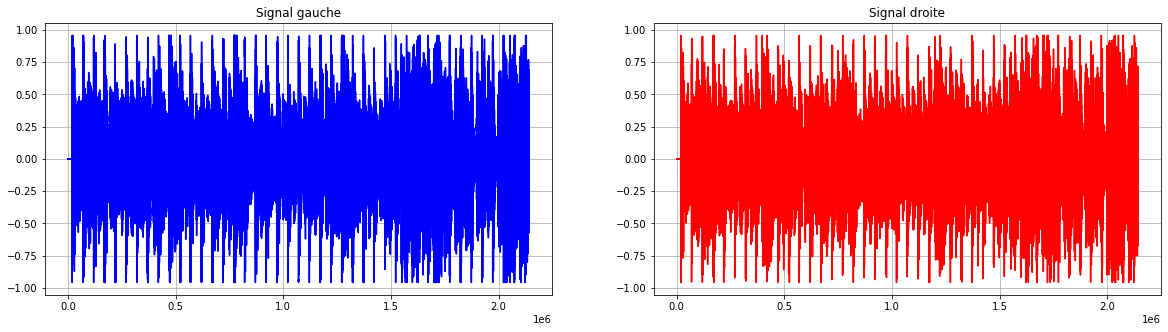

In [87]:
def spectreAmpl(fich):
    gauche, droite = sortie(fich)
    Fe = sf.info(fich).samplerate
    
    tg = arange(0, (1/Fe)*len(gauche), 1/Fe)
    td = arange(0, (1/Fe)*len(droite), 1/Fe)

    figure(figsize = (20, 5))
    subplot(121)
    plot(gauche, "b-")
    title("Signal gauche")
    grid()
    subplot(122)
    plot(droite, "r-")
    title("Signal droite")
    grid()
spectreAmpl("AJS_short.flac")

# 5: Spectre d’amplitude des pistes d’un fichier audio

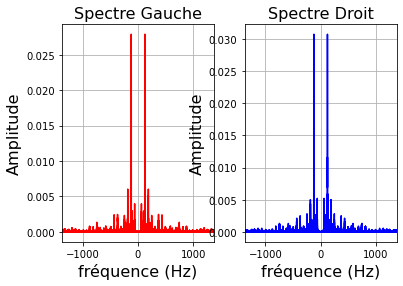

In [98]:
def plotFreq(fich):
    """Trace le spectre d'amplitude du signal sig, qui est échantillonné à fe Hz. c indique la couleur souhaité (ex : 'b' pour bleu). titre indique le titre."""
    gauche, droite = sortie(fich)
    fe = sf.info(fich).samplerate
    longueurG=len(gauche)
    specOrig=abs((1/longueurG)*fftshift(fft(gauche)))
    freqG = arange(-fe/2,fe/2,fe/longueurG) 
    style = 'r-'
    #display(style)
    subplot(121)
    plot(freqG, specOrig,style)
    grid()
    title('Spectre Gauche', fontsize=16)
    xlim([-fe/32, fe/32])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
    
    longueurD=len(droite)
    specOrig=abs((1/longueurD)*fftshift(fft(droite)))
    freqD = arange(-fe/2,fe/2,fe/longueurD) 
    style = 'b-'
    #display(style)
    subplot(122)
    plot(freqD, specOrig,style)
    grid()
    title('Spectre Droit', fontsize=16)
    xlim([-fe/32, fe/32])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
plotFreq("PF_short.flac")

# 6: Peut-on déterminer si un morceau est de qualité SD et HD en observant représentation temporelle et/ou fréquentielle d’un fichier audio ?

La répresentation temporelle unique ne suffit pas, le spectre peut indiquer plus de fréquences élevées en HD alors que le contenu audio lui peut être de faible qualité même en HD s'il a été mal encodé.

# 7: Ecrire une fonction qui extrait les x premières secondes des pistes d’un fichier flac.


In [108]:
def extraction(fich, temps):
    types = fich.replace(".", " ")
    test = types.split()
    assert test[-1] == "flac", ("Cette fonction est réservée au fichier audio de types flac")
    data, samplerate = sf.read(fich)
    return data[0:temps*samplerate]

extraction("AJS_short.flac", 5)

array([[ 9.89437103e-06,  1.37090683e-05],
       [ 1.32322311e-05,  1.50203705e-05],
       [ 4.76837158e-06, -4.76837158e-06],
       ...,
       [-1.01866484e-01, -1.12268567e-01],
       [-9.69731808e-02, -1.09002948e-01],
       [-9.78825092e-02, -1.09822273e-01]])

# 8: Proposez un script pour générer des flacs contenant les 3 premières secondes des fichiers flac fournis.

In [127]:
def flacModif(fich, temps):
    types = fich.replace(".", " ")
    test = types.split()
    sf.write('extrait_'+test[0]+'_'+str(temps)+'s.flac', extraction(fich,temps), sf.read(fich)[1])
flacModif("AJS_short.flac", 3)
flacModif("Hoo_short.flac", 3)
flacModif("PF_short.flac", 3)
infoAJS = sf.info("extrait_AJS_short_3s.flac")
infoHoo = sf.info("extrait_Hoo_short_3s.flac") 
infoPF = sf.info("extrait_PF_short_3s.flac") 
print(f"Nombre d'échantillons AJS: {infoAJS.frames}")
print(f"Nombre d'échantillons Hoo: {infoHoo.frames}")
print(f"Nombre d'échantillons PF: {infoPF.frames}")


Nombre d'échantillons AJS: 288000
Nombre d'échantillons Hoo: 132300
Nombre d'échantillons PF: 132300
